In [855]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

Reading the datafiles

In [856]:
encounters = pd.read_csv("encounters.csv")
patients = pd.read_csv("patients.csv")
conditions = pd.read_csv("conditions.csv")
allergies = pd.read_csv("allergies.csv")
observations = pd.read_csv("observations.csv")

In [857]:
immunizations = pd.read_csv("immunizations.csv")
medications = pd.read_csv("medications.csv")
procedures = pd.read_csv("procedures.csv")

Merging the patient and encounters data

In [858]:
pat_enc = pd.merge(patients, encounters, left_on='Id', right_on='PATIENT', how='inner')

In [859]:
#patients[patients.Id == '360a1024-645a-4c50-b94c-1689b34beace']

In [860]:
procedures.head(5)

,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,1999-02-01,ae1f5428-ed4a-48ee-8444-47db56f71310,e6a92f2d-4e6b-4f3c-b382-7584e5a2eb37,430193006,Medication Reconciliation (procedure),702.94,NaN,NaN
1,1999-03-08,ae1f5428-ed4a-48ee-8444-47db56f71310,4c311d16-4a91-4173-8b86-5a7008b3a5d9,430193006,Medication Reconciliation (procedure),516.89,NaN,NaN
2,1999-10-11,ae1f5428-ed4a-48ee-8444-47db56f71310,3a3df079-f9f1-477e-ab3a-27d85cb8a076,430193006,Medication Reconciliation (procedure),649.67,NaN,NaN
3,2000-01-10,ae1f5428-ed4a-48ee-8444-47db56f71310,96d89d6f-5ce7-4820-b9b4-8094e1a185c1,430193006,Medication Reconciliation (procedure),934.87,NaN,NaN
4,2000-01-28,ae1f5428-ed4a-48ee-8444-47db56f71310,c269ce33-43b7-497b-806d-ccfb4e4194ed,269911007,Sputum examination (procedure),7528.16,10509002.0,Acute bronchitis (disorder)


In [861]:
immunizations=immunizations[['PATIENT','ENCOUNTER','BASE_COST']].rename(columns={'BASE_COST':'IMM_COST'})
medications=medications[['PATIENT','ENCOUNTER','BASE_COST']].rename(columns={'BASE_COST':'MEDN_COST'})
procedures=procedures[['PATIENT','ENCOUNTER','BASE_COST']].rename(columns={'BASE_COST':'PROC_COST'})

Aggregating the amount spent by a patient on immunization, medication and procedures at encounter level

In [862]:
immunizations=immunizations.groupby(['PATIENT','ENCOUNTER']).sum()
medications=medications.groupby(['PATIENT','ENCOUNTER']).sum()
procedures=procedures.groupby(['PATIENT','ENCOUNTER']).sum()
immunizations.reset_index(inplace=True)
medications.reset_index(inplace=True)
procedures.reset_index(inplace=True)

Dropping the unnecessary columns

In [863]:
pat_enc.drop(['SSN', 'DRIVERS', 'PASSPORT', 'PREFIX', 'FIRST', 'LAST', 'SUFFIX', 'MAIDEN','BIRTHPLACE', 'ADDRESS','COUNTY', 'ZIP', 'LAT', 'LON','PATIENT'], axis=1, inplace=True)

We will consider only alive patients

In [864]:

pat_enc = pat_enc[pat_enc['DEATHDATE'].isnull()]

In [865]:
pat_enc.head()

,Id_x,BIRTHDATE,DEATHDATE,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Id_y,START,STOP,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,a02c00f0-dc50-4174-a095-234c221350c7,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN
1,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,45f4fce9-db74-4d59-81d8-0294968e9772,1964-03-12T16:30:30Z,1964-03-12T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN
2,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,1964-05-14T16:30:30Z,1964-05-14T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN
3,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,3259845f-2856-4c3d-993f-e974bbceded8,1964-07-16T16:30:30Z,1964-07-16T16:45:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN
4,360a1024-645a-4c50-b94c-1689b34beace,1964-02-06,NaN,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,d2581002-932d-4331-b204-45890e211dc1,1964-10-15T16:30:30Z,1964-10-15T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN


Joining the patient-encounter dataframe with the immunization, medications and procedures dataframe to get the amount spent on these.

In [866]:
pat_enc = pd.merge(pat_enc,immunizations, left_on='Id_y',right_on='ENCOUNTER', how='left')


In [867]:
pat_enc = pd.merge(pat_enc,medications, left_on='Id_y',right_on='ENCOUNTER', how='left')


In [868]:
pat_enc = pd.merge(pat_enc,procedures, left_on='Id_y',right_on='ENCOUNTER', how='left')

Function to claculate Age

In [869]:
from datetime import datetime, date
# This function converts given date to age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [870]:
pat_enc['Age'] = pat_enc['BIRTHDATE'].apply(age)
pat_enc.drop(['BIRTHDATE','DEATHDATE'], axis=1, inplace=True)


In [871]:
pat_enc.head(500)

,Id_x,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,Id_y,START,STOP,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION,PATIENT_x,ENCOUNTER_x,IMM_COST,PATIENT_y,ENCOUNTER_y,MEDN_COST,PATIENT,ENCOUNTER,PROC_COST,Age
0,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,a02c00f0-dc50-4174-a095-234c221350c7,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57
1,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,45f4fce9-db74-4d59-81d8-0294968e9772,1964-03-12T16:30:30Z,1964-03-12T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,45f4fce9-db74-4d59-81d8-0294968e9772,450.03,57
2,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,1964-05-14T16:30:30Z,1964-05-14T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,140.52,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,661.56,57
3,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,3259845f-2856-4c3d-993f-e974bbceded8,1964-07-16T16:30:30Z,1964-07-16T16:45:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,3259845f-2856-4c3d-993f-e974bbceded8,140.52,NaN,NaN,NaN,NaN,NaN,NaN,57
4,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,d2581002-932d-4331-b204-45890e211dc1,1964-10-15T16:30:30Z,1964-10-15T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,d2581002-932d-4331-b204-45890e211dc1,281.04,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,d2581002-932d-4331-b204-45890e211dc1,664.77,57
5,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,54714df6-b77a-4365-a23d-5c7f211acd12,1965-01-14T16:30:30Z,1965-01-14T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,54714df6-b77a-4365-a23d-5c7f211acd12,565.16,57
6,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,7c2c1982-5246-42b1-babc-30e879bb5282,1965-04-15T16:30:30Z,1965-04-15T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,7c2c1982-5246-42b1-babc-30e879bb5282,305.35,57
7,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87,3977.08,e8555487-fd58-4c33-8034-77304a3db801,1965-07-15T16:30:30Z,1965-07-15T17:00:30Z,b085288a-8635-3cda-b75a-ba173f2fc961,d47b3510-2895-3b70-9897-342d681c769d,wellness,410620009,Well child visit (procedure),129.16,129.16,49.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360a1024-645a-4c50-b94c-1689b34beace,e8555487-fd58-4c33-8034-77304a3db801,491.42,57
8,360a1024-645a-4c50-b94c-1689b34beace,M,white,nonhispanic,M,Peabody,Massachusetts,1151953.87

In [872]:
#pat_enc[pat_enc.Id_x == '360a1024-645a-4c50-b94c-1689b34beace']

We are merging conditions and allergies data to find out active conditions/allergies as of cutoff date

In [873]:
illness = conditions.append(allergies)

In [874]:
#illness = illness[ (illness.START<'2019-04-20') & ((illness.STOP > '2019-04-20') | (illness.STOP.isnull()))]

In [875]:
illness.head(5)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,1993-04-29,1993-05-13,2d0a9468-9cc7-47c6-a757-2944fb7a754d,4548cd8e-7578-46b5-8028-2b2164b00b6d,444814009,Viral sinusitis (disorder)
1,1996-02-02,1996-02-09,2d0a9468-9cc7-47c6-a757-2944fb7a754d,3c6727fd-c572-481c-85ae-9832b147a021,444814009,Viral sinusitis (disorder)
2,1997-04-12,1997-04-26,2d0a9468-9cc7-47c6-a757-2944fb7a754d,259ded9d-aaf8-48f9-a32b-c255140c0cd9,444814009,Viral sinusitis (disorder)
3,2000-08-15,2000-08-22,2d0a9468-9cc7-47c6-a757-2944fb7a754d,799fa549-801b-47bd-b6ca-592d8e7c931e,444814009,Viral sinusitis (disorder)
4,2000-01-28,2000-02-04,ae1f5428-ed4a-48ee-8444-47db56f71310,c269ce33-43b7-497b-806d-ccfb4e4194ed,10509002,Acute bronchitis (disorder)


In [876]:
illness['value'] = 1
illness = illness.groupby(['PATIENT','CODE']).sum()

In [877]:
illness.reset_index(inplace=True)

In [878]:
illness = illness.pivot(index=['PATIENT'], columns='CODE', values='value').fillna(0)


In [879]:
illness.reset_index(inplace=True)

In [880]:
illness.shape

(11444, 171)

Let us divide the expense into 2 parts
1. Since the beginning till 1 year back
2. Last 1 year
20th April 2020 is the max date in the dataset, we will divide the dataset using cutoff date 20th-Apr-2019

Basically we will be using the patient's expense data before cutoff date(pat_enc_X) to predict patient's expense in last 1 year(post cut off date)(pat_enc_y)

In [881]:
pat_enc.drop(['PATIENT_x','ENCOUNTER_x','PATIENT_y','ENCOUNTER_y','PATIENT','ENCOUNTER'],axis=1, inplace=True)

In [882]:
pat_enc_X = pat_enc[pat_enc.START < '2019-04-20']
pat_enc_Y = pat_enc[pat_enc.START >= '2019-04-20']

In [883]:
#pat_enc_X[pat_enc_X.Id_x == '360a1024-645a-4c50-b94c-1689b34beace']

In [884]:
#pat_enc_Y[pat_enc_Y.Id_x == '360a1024-645a-4c50-b94c-1689b34beace']

In [885]:
pat_enc_Y.columns

Index(['Id_x', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'CITY', 'STATE',
       'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'Id_y', 'START', 'STOP',
       'PROVIDER', 'PAYER', 'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION',
       'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE',
       'REASONCODE', 'REASONDESCRIPTION', 'IMM_COST', 'MEDN_COST', 'PROC_COST',
       'Age'],
      dtype='object')

In [886]:
#pat_enc_Y[pat_enc_Y.Id_x == '360a1024-645a-4c50-b94c-1689b34beace']

Aggregating the various costs (Base Encounter, Medication, Immunization and Procedure) at the patient level.

In [887]:
pat_enc_Y = pat_enc_Y[['Id_x','BASE_ENCOUNTER_COST','MEDN_COST','IMM_COST','PROC_COST']].groupby('Id_x').sum()
pat_enc_Y.fillna(0)

,BASE_ENCOUNTER_COST,MEDN_COST,IMM_COST,PROC_COST
Id_x,,,,
0002edb7-9477-4bc9-a2b7-d5137e7e9ed4,516.64,271.08,140.52,1531.07
00059e58-4f1f-49de-b008-3ec6c2aac7e7,129.16,0.00,140.52,761.16
0007fa20-c7b2-4764-b4f1-c3e96b241082,904.12,37.80,562.08,13468.82
000f6134-cefd-41f8-8bc7-144221c7e07e,258.32,263.49,281.04,0.00
000ffb8b-d295-44a7-9d88-45d39ea9d2ba,1033.28,6549.93,140.52,4347.93
...,...,...,...,...
ffe9b100-c774-4c90-bde9-d96a3c9b3d01,129.16,0.00,421.56,552.30
fff28666-e162-4fe2-86f5-7d99754effe0,129.16,0.00,140.52,624.85
fff5c1ca-310b-4038-a057-57a571f1dbe6,129.16,1150.92,281.04,432.89


In [888]:
pat_enc_Y['Total']=pat_enc_Y['BASE_ENCOUNTER_COST']+pat_enc_Y['MEDN_COST']+pat_enc_Y['IMM_COST']+pat_enc_Y['PROC_COST']

In [889]:
pat_enc_Y.reset_index(inplace=True)

Below are our Target dataframe, we can use either of these columns as target in our model.

In [890]:
pat_enc_Y.head(5)

,Id_x,BASE_ENCOUNTER_COST,MEDN_COST,IMM_COST,PROC_COST,Total
0,0002edb7-9477-4bc9-a2b7-d5137e7e9ed4,516.64,271.08,140.52,1531.07,2459.31
1,00059e58-4f1f-49de-b008-3ec6c2aac7e7,129.16,0.00,140.52,761.16,1030.84
2,0007fa20-c7b2-4764-b4f1-c3e96b241082,904.12,37.80,562.08,13468.82,14972.82
3,000f6134-cefd-41f8-8bc7-144221c7e07e,258.32,263.49,281.04,0.00,802.85
4,000ffb8b-d295-44a7-9d88-45d39ea9d2ba,1033.28,6549.93,140.52,4347.93,12071.66


Now we will work on features selection and encoding for our model

In [891]:
pat_enc_X = pat_enc_X[['Id_x','Id_y', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'CITY',
         'START', 'STOP', 'ENCOUNTERCLASS', 'CODE',
       'BASE_ENCOUNTER_COST', 'IMM_COST', 'MEDN_COST', 'PROC_COST',
       'Age']]

In [892]:
pat_enc_X.head()

,Id_x,Id_y,MARITAL,RACE,ETHNICITY,GENDER,CITY,START,STOP,ENCOUNTERCLASS,CODE,BASE_ENCOUNTER_COST,IMM_COST,MEDN_COST,PROC_COST,Age
0,360a1024-645a-4c50-b94c-1689b34beace,a02c00f0-dc50-4174-a095-234c221350c7,M,white,nonhispanic,M,Peabody,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,wellness,410620009,129.16,NaN,NaN,NaN,57
1,360a1024-645a-4c50-b94c-1689b34beace,45f4fce9-db74-4d59-81d8-0294968e9772,M,white,nonhispanic,M,Peabody,1964-03-12T16:30:30Z,1964-03-12T17:00:30Z,wellness,410620009,129.16,NaN,NaN,450.03,57
2,360a1024-645a-4c50-b94c-1689b34beace,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,M,white,nonhispanic,M,Peabody,1964-05-14T16:30:30Z,1964-05-14T17:00:30Z,wellness,410620009,129.16,140.52,NaN,661.56,57
3,360a1024-645a-4c50-b94c-1689b34beace,3259845f-2856-4c3d-993f-e974bbceded8,M,white,nonhispanic,M,Peabody,1964-07-16T16:30:30Z,1964-07-16T16:45:30Z,wellness,410620009,129.16,140.52,NaN,NaN,57
4,360a1024-645a-4c50-b94c-1689b34beace,d2581002-932d-4331-b204-45890e211dc1,M,white,nonhispanic,M,Peabody,1964-10-15T16:30:30Z,1964-10-15T17:00:30Z,wellness,410620009,129.16,281.04,NaN,664.77,57


In [893]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
pat_enc_X['MARITAL'] = pat_enc_X['MARITAL'].fillna('NA')
pat_enc_X['CODE'] = pat_enc_X['CODE'].map(str)


Encoding the categorical features 'MARITAL','RACE','ETHNICITY','GENDER' into dummy variables

In [894]:
feat_dummies= pd.get_dummies(pat_enc_X[['MARITAL','RACE','ETHNICITY','GENDER']], prefix_sep='_', drop_first=False)

In [895]:
feat_dummies.head(3)

,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M
0,1,0,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,1,0,1


In [896]:
pat_enc_X.drop(['MARITAL','RACE','ETHNICITY','GENDER'], axis=1, inplace=True)

In [897]:
pat_enc_X = pd.concat([feat_dummies,pat_enc_X], axis=1)

In [898]:
pat_enc_Y.count()

Id_x                   9245
BASE_ENCOUNTER_COST    9245
MEDN_COST              9245
IMM_COST               9245
PROC_COST              9245
Total                  9245
dtype: int64

Below are our features (X columns)

In [899]:
pat_enc_X.head(5)

,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M,Id_x,Id_y,CITY,START,STOP,ENCOUNTERCLASS,CODE,BASE_ENCOUNTER_COST,IMM_COST,MEDN_COST,PROC_COST,Age
0,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,a02c00f0-dc50-4174-a095-234c221350c7,Peabody,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,wellness,410620009,129.16,NaN,NaN,NaN,57
1,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,45f4fce9-db74-4d59-81d8-0294968e9772,Peabody,1964-03-12T16:30:30Z,1964-03-12T17:00:30Z,wellness,410620009,129.16,NaN,NaN,450.03,57
2,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,Peabody,1964-05-14T16:30:30Z,1964-05-14T17:00:30Z,wellness,410620009,129.16,140.52,NaN,661.56,57
3,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,3259845f-2856-4c3d-993f-e974bbceded8,Peabody,1964-07-16T16:30:30Z,1964-07-16T16:45:30Z,wellness,410620009,129.16,140.52,NaN,NaN,57
4,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,d2581002-932d-4331-b204-45890e211dc1,Peabody,1964-10-15T16:30:30Z,1964-10-15T17:00:30Z,wellness,410620009,129.16,281.04,NaN,664.77,57


In [900]:
#pat_enc_X[pat_enc_X.Id_x == '360a1024-645a-4c50-b94c-1689b34beace']

Below is the function to find years since patient's first encounter

In [901]:
from datetime import datetime, date

def duration(start):
    start = datetime.strptime(start[0:10], "%Y-%m-%d").date()
    today = date.today()
    return today.year - start.year - ((today.month, 
                                      today.day) < (start.month, 
                                                    start.day))





In [902]:
pat_enc_X_start = pat_enc_X[['Id_x','START']].groupby(['Id_x']).min()

In [903]:

#pat_enc_X.drop(['Id_y','CITY','START','STOP','ENCOUNTERCLASS','CODE'],axis=1, inplace=True)

In [904]:
pat_enc_X = pat_enc_X.fillna(0)

In [905]:
pat_enc_X.head(5)

,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M,Id_x,Id_y,CITY,START,STOP,ENCOUNTERCLASS,CODE,BASE_ENCOUNTER_COST,IMM_COST,MEDN_COST,PROC_COST,Age
0,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,a02c00f0-dc50-4174-a095-234c221350c7,Peabody,1964-02-06T16:30:30Z,1964-02-06T16:45:30Z,wellness,410620009,129.16,0.00,0.0,0.00,57
1,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,45f4fce9-db74-4d59-81d8-0294968e9772,Peabody,1964-03-12T16:30:30Z,1964-03-12T17:00:30Z,wellness,410620009,129.16,0.00,0.0,450.03,57
2,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,8309e277-b36e-48cf-bdd9-e9b6fe9a8338,Peabody,1964-05-14T16:30:30Z,1964-05-14T17:00:30Z,wellness,410620009,129.16,140.52,0.0,661.56,57
3,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,3259845f-2856-4c3d-993f-e974bbceded8,Peabody,1964-07-16T16:30:30Z,1964-07-16T16:45:30Z,wellness,410620009,129.16,140.52,0.0,0.00,57
4,1,0,0,0,0,0,0,1,0,1,0,1,360a1024-645a-4c50-b94c-1689b34beace,d2581002-932d-4331-b204-45890e211dc1,Peabody,1964-10-15T16:30:30Z,1964-10-15T17:00:30Z,wellness,410620009,129.16,281.04,0.0,664.77,57


In [906]:
pat_enc_X['VALUE'] = 1

Encoding the the categorical features 'CODE','ENCOUNTERCLASS' to dummyy variables

In [907]:
#pat_enc_X = pat_enc_X.groupby(['Id_x','MARITAL','RACE','ETHNICITY','GENDER','Age']).sum()
pivot_df = pat_enc_X.pivot(index=['Id_x','Id_y'], columns=['CODE','ENCOUNTERCLASS'] , values='VALUE')

In [908]:
pivot_df.reset_index(inplace=True)

In [909]:
pivot_df=pivot_df.fillna(0)

In [910]:
pivot_df = pivot_df.groupby('Id_x').sum()

C:\Users\soodi\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [911]:
pivot_df.reset_index(inplace=True)

In [912]:
pat_enc_X.reset_index(inplace=True)

In [913]:
pat_enc_X.drop(['index','Id_y','CITY','START','STOP'],axis=1, inplace=True)

In [914]:
pat_enc_X.columns

Index(['MARITAL_M', 'MARITAL_NA', 'MARITAL_S', 'RACE_asian', 'RACE_black',
       'RACE_native', 'RACE_other', 'RACE_white', 'ETHNICITY_hispanic',
       'ETHNICITY_nonhispanic', 'GENDER_F', 'GENDER_M', 'Id_x',
       'ENCOUNTERCLASS', 'CODE', 'BASE_ENCOUNTER_COST', 'IMM_COST',
       'MEDN_COST', 'PROC_COST', 'Age', 'VALUE'],
      dtype='object')

Aggregating the data at Patient Id level

In [915]:
pat_enc_X = pat_enc_X.groupby('Id_x').agg({'Age':max,'MARITAL_M':max,'MARITAL_NA':max,'MARITAL_S':max,'RACE_asian':max,'RACE_black':max,'RACE_native':max,'RACE_other':max,'RACE_white':max,'ETHNICITY_hispanic':max,'ETHNICITY_nonhispanic':max,'GENDER_F':max,'GENDER_M':max,'BASE_ENCOUNTER_COST':sum, 'IMM_COST':sum, 'MEDN_COST':sum, 'PROC_COST':sum})

In [916]:
#pat_enc_cat.reset_index(inplace=True)
pat_enc_X = pd.merge(pat_enc_X, pat_enc_X_start['START'].map(duration).reset_index(), on='Id_x', how='inner')

Calculating average cost of treatments per year

In [917]:
#pat_enc_feat = pat_enc_feat.fillna(0)
#pat_enc_feat.reset_index()
#pat_enc_feat.head()
pat_enc_X.head(10)


,Id_x,Age,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M,BASE_ENCOUNTER_COST,IMM_COST,MEDN_COST,PROC_COST,START
0,0002edb7-9477-4bc9-a2b7-d5137e7e9ed4,80,0,0,1,0,0,0,0,1,0,1,0,1,17953.24,8852.76,8382.49,56987.46,80
1,00059e58-4f1f-49de-b008-3ec6c2aac7e7,49,1,0,0,0,0,0,0,1,0,1,1,0,15499.20,5761.32,1334.57,861018.06,49
2,0007fa20-c7b2-4764-b4f1-c3e96b241082,23,0,1,0,0,0,0,0,1,0,1,1,0,6845.48,6463.92,1936.96,41369.51,23
3,000f6134-cefd-41f8-8bc7-144221c7e07e,82,1,0,0,0,0,0,0,1,0,1,0,1,18599.04,8571.72,13639.19,204560.05,82
4,000ffb8b-d295-44a7-9d88-45d39ea9d2ba,61,1,0,0,0,0,0,0,1,0,1,0,1,23119.64,8993.28,62934.40,96399.47,61
5,0012398d-381b-44f4-879f-a5dc81bdf7be,27,0,1,0,0,0,0,0,1,0,1,1,0,10074.48,6885.48,706.36,467421.96,27
6,0014e2ee-ca5f-4c5f-8b2d-0bc679d88c1b,39,0,0,1,0,0,0,0,1,1,0,1,0,18599.04,8009.64,10239.00,825000.90,39
7,001ca87e-d02c-44fc-b05a-63f932170d26,70,0,0,1,0,0,0,0,1,0,1,1,0,23636.28,7869.12,7588.71,1183874.44,70
8,00225a7d-5b9e-4e86-ae2f-2a0eaf681395,49,1,0,0,0,0,0,0,1,0,1,0,1,17049.12,5901.84,1084.56,762541.37,49
9,0023f6ab-c675-4c96-a970-660e2f7bd00e,62,0,0,1,0,0,0,0,1,0,1,0,1,13820.12,7869.12,7103.87,87224.77,62


In [918]:
#pat_enc_feat = pat_enc_feat.groupby('Id_x').sum()

In [919]:
#merged_X = pd.merge(pat_enc_cat,pat_enc_feat, on='Id_x',how='inner')
merged_X = pd.merge(pat_enc_X,pivot_df, on='Id_x',how='inner')

C:\Users\soodi\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\soodi\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [920]:
merged_X =  pd.merge(merged_X,illness,left_on='Id_x',right_on='PATIENT', how='inner')

In [921]:
for c in merged_X.columns:
    print(c)

Id_x
Age
MARITAL_M
MARITAL_NA
MARITAL_S
RACE_asian
RACE_black
RACE_native
RACE_other
RACE_white
ETHNICITY_hispanic
ETHNICITY_nonhispanic
GENDER_F
GENDER_M
BASE_ENCOUNTER_COST
IMM_COST
MEDN_COST
PROC_COST
START
('410620009', 'wellness')
('50849002', 'emergency')
('185345009', 'ambulatory')
('185349003', 'ambulatory')
('185349003', 'outpatient')
('162673000', 'wellness')
('185347001', 'ambulatory')
('185345009', 'outpatient')
('698314001', 'outpatient')
('308335008', 'outpatient')
('424441002', 'ambulatory')
('270427003', 'ambulatory')
('424619006', 'ambulatory')
('185347001', 'inpatient')
('183460006', 'emergency')
('169762003', 'ambulatory')
('702927004', 'urgentcare')
('390906007', 'ambulatory')
('170837001', 'ambulatory')
('371883000', 'ambulatory')
('170838006', 'ambulatory')
('394701000', 'ambulatory')
('183478001', 'emergency')
('183495009', 'inpatient')
('305408004', 'inpatient')
('79094001', 'ambulatory')
('185317003', 'ambulatory')
('47505003', 'ambulatory')
('210098006', 'ambu

Creating the final dataframe by combining X and Y(target) columns.

In [922]:
final_merged_df = pd.merge(merged_X,pat_enc_Y, on='Id_x', how='inner')

In [923]:
for c in final_merged_df.columns:
    print(c)

Id_x
Age
MARITAL_M
MARITAL_NA
MARITAL_S
RACE_asian
RACE_black
RACE_native
RACE_other
RACE_white
ETHNICITY_hispanic
ETHNICITY_nonhispanic
GENDER_F
GENDER_M
BASE_ENCOUNTER_COST_x
IMM_COST_x
MEDN_COST_x
PROC_COST_x
START
('410620009', 'wellness')
('50849002', 'emergency')
('185345009', 'ambulatory')
('185349003', 'ambulatory')
('185349003', 'outpatient')
('162673000', 'wellness')
('185347001', 'ambulatory')
('185345009', 'outpatient')
('698314001', 'outpatient')
('308335008', 'outpatient')
('424441002', 'ambulatory')
('270427003', 'ambulatory')
('424619006', 'ambulatory')
('185347001', 'inpatient')
('183460006', 'emergency')
('169762003', 'ambulatory')
('702927004', 'urgentcare')
('390906007', 'ambulatory')
('170837001', 'ambulatory')
('371883000', 'ambulatory')
('170838006', 'ambulatory')
('394701000', 'ambulatory')
('183478001', 'emergency')
('183495009', 'inpatient')
('305408004', 'inpatient')
('79094001', 'ambulatory')
('185317003', 'ambulatory')
('47505003', 'ambulatory')
('210098006

In [924]:
final_merged_df.drop(['Id_x','START','PATIENT'], axis=1, inplace=True)

Scaling the numerical data (various costs associated with the patients)

In [925]:
#city = ['CITY_Abington','CITY_Acton','CITY_Acushnet','CITY_Adams','CITY_Agawam','CITY_Alford','CITY_Amesbury','CITY_Amherst','CITY_Andover','CITY_Arlington','CITY_Ashburnham','CITY_Ashby','CITY_Ashfield','CITY_Ashland','CITY_Athol','CITY_Attleboro','CITY_Auburn','CITY_Avon','CITY_Ayer','CITY_Barnstable','CITY_Barre','CITY_Becket','CITY_Bedford','CITY_Belchertown','CITY_Bellingham','CITY_Belmont','CITY_Berkley','CITY_Berlin','CITY_Beverly','CITY_Billerica','CITY_Blackstone','CITY_Blandford','CITY_Bolton','CITY_Boston','CITY_Bourne','CITY_Boxborough','CITY_Boxford','CITY_Boylston','CITY_Braintree','CITY_Brewster','CITY_Bridgewater','CITY_Brimfield','CITY_Brockton','CITY_Brookfield','CITY_Brookline','CITY_Buckland','CITY_Burlington','CITY_Cambridge','CITY_Canton','CITY_Carlisle','CITY_Carver','CITY_Charlemont','CITY_Charlton','CITY_Chatham','CITY_Chelmsford','CITY_Chelsea','CITY_Cheshire','CITY_Chesterfield','CITY_Chicopee','CITY_Chilmark','CITY_Clarksburg','CITY_Clinton','CITY_Cohasset','CITY_Colrain','CITY_Concord','CITY_Conway','CITY_Cummington','CITY_Dalton','CITY_Danvers','CITY_Dartmouth','CITY_Dedham','CITY_Deerfield','CITY_Dennis','CITY_Dighton','CITY_Douglas','CITY_Dover','CITY_Dracut','CITY_Dudley','CITY_Dunstable','CITY_Duxbury','CITY_East Bridgewater','CITY_East Longmeadow','CITY_Eastham','CITY_Easthampton','CITY_Easton','CITY_Edgartown','CITY_Egremont','CITY_Erving','CITY_Essex','CITY_Everett','CITY_Fairhaven','CITY_Fall River','CITY_Falmouth','CITY_Fitchburg','CITY_Florida','CITY_Foxborough','CITY_Framingham','CITY_Franklin','CITY_Freetown','CITY_Gardner','CITY_Georgetown','CITY_Gill','CITY_Gloucester','CITY_Goshen','CITY_Grafton','CITY_Granby','CITY_Granville','CITY_Great Barrington','CITY_Greenfield','CITY_Groton','CITY_Groveland','CITY_Hadley','CITY_Halifax','CITY_Hamilton','CITY_Hampden','CITY_Hancock','CITY_Hanover','CITY_Hanson','CITY_Hardwick','CITY_Harvard','CITY_Harwich','CITY_Hatfield','CITY_Haverhill','CITY_Heath','CITY_Hingham','CITY_Hinsdale','CITY_Holbrook','CITY_Holden','CITY_Holland','CITY_Holliston','CITY_Holyoke','CITY_Hopedale','CITY_Hopkinton','CITY_Hubbardston','CITY_Hudson','CITY_Hull','CITY_Huntington','CITY_Ipswich','CITY_Kingston','CITY_Lakeville','CITY_Lancaster','CITY_Lanesborough','CITY_Lawrence','CITY_Lee','CITY_Leicester','CITY_Lenox','CITY_Leominster','CITY_Leverett','CITY_Lexington','CITY_Lincoln','CITY_Littleton','CITY_Longmeadow','CITY_Lowell','CITY_Ludlow','CITY_Lunenburg','CITY_Lynn','CITY_Lynnfield','CITY_Malden','CITY_Manchester-by-the-Sea','CITY_Mansfield','CITY_Marblehead','CITY_Marion','CITY_Marlborough','CITY_Marshfield','CITY_Mashpee','CITY_Mattapoisett','CITY_Maynard','CITY_Medfield','CITY_Medford','CITY_Medway','CITY_Melrose','CITY_Mendon','CITY_Merrimac','CITY_Methuen','CITY_Middleborough','CITY_Middlefield','CITY_Middleton','CITY_Milford','CITY_Millbury','CITY_Millis','CITY_Millville','CITY_Milton','CITY_Monson','CITY_Montague','CITY_Monterey','CITY_Nahant','CITY_Nantucket','CITY_Natick','CITY_Needham','CITY_New Ashford','CITY_New Bedford','CITY_New Braintree','CITY_New Marlborough','CITY_New Salem','CITY_Newbury','CITY_Newburyport','CITY_Newton','CITY_Norfolk','CITY_North Adams','CITY_North Andover','CITY_North Attleborough','CITY_North Brookfield','CITY_North Reading','CITY_Northampton','CITY_Northborough','CITY_Northbridge','CITY_Northfield','CITY_Norton','CITY_Norwell','CITY_Norwood','CITY_Oak Bluffs','CITY_Oakham','CITY_Orange','CITY_Orleans','CITY_Otis','CITY_Oxford','CITY_Palmer','CITY_Paxton','CITY_Peabody','CITY_Pembroke','CITY_Pepperell','CITY_Peru','CITY_Petersham','CITY_Phillipston','CITY_Pittsfield','CITY_Plainville','CITY_Plymouth','CITY_Plympton','CITY_Princeton','CITY_Provincetown','CITY_Quincy','CITY_Randolph','CITY_Raynham','CITY_Reading','CITY_Rehoboth','CITY_Revere','CITY_Richmond','CITY_Rochester','CITY_Rockland','CITY_Rockport','CITY_Rowe','CITY_Rowley','CITY_Russell','CITY_Rutland','CITY_Salem','CITY_Salisbury','CITY_Sandisfield','CITY_Sandwich','CITY_Saugus','CITY_Savoy','CITY_Scituate','CITY_Seekonk','CITY_Sharon','CITY_Sheffield','CITY_Shelburne','CITY_Sherborn','CITY_Shirley','CITY_Shrewsbury','CITY_Shutesbury','CITY_Somerset','CITY_Somerville','CITY_South Hadley','CITY_Southampton','CITY_Southborough','CITY_Southbridge','CITY_Southwick','CITY_Spencer','CITY_Springfield','CITY_Sterling','CITY_Stockbridge','CITY_Stoneham','CITY_Stoughton','CITY_Stow','CITY_Sturbridge','CITY_Sudbury','CITY_Sunderland','CITY_Sutton','CITY_Swampscott','CITY_Swansea','CITY_Taunton','CITY_Templeton','CITY_Tewksbury','CITY_Tisbury','CITY_Topsfield','CITY_Townsend','CITY_Truro','CITY_Tyngsborough','CITY_Upton','CITY_Uxbridge','CITY_Wakefield','CITY_Wales','CITY_Walpole','CITY_Waltham','CITY_Ware','CITY_Wareham','CITY_Warren','CITY_Warwick','CITY_Watertown','CITY_Wayland','CITY_Webster','CITY_Wellesley','CITY_Wellfleet','CITY_Wendell','CITY_Wenham','CITY_West Boylston','CITY_West Bridgewater','CITY_West Brookfield','CITY_West Newbury','CITY_West Springfield','CITY_West Stockbridge','CITY_West Tisbury','CITY_Westborough','CITY_Westfield','CITY_Westford','CITY_Westhampton','CITY_Westminster','CITY_Weston','CITY_Westport','CITY_Westwood','CITY_Weymouth','CITY_Whately','CITY_Whitman','CITY_Wilbraham','CITY_Williamsburg','CITY_Williamstown','CITY_Wilmington','CITY_Winchendon','CITY_Winchester','CITY_Windsor','CITY_Winthrop','CITY_Woburn','CITY_Worcester','CITY_Worthington','CITY_Wrentham','CITY_Yarmouth']
#for ct in city:
 #   final_merged_df[ct]=final_merged_df[ct].map(convert_bit)
final_merged_df.shape

(9031, 242)

In [926]:


final_merged_df.head(100)

,Age,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M,BASE_ENCOUNTER_COST_x,IMM_COST_x,MEDN_COST_x,PROC_COST_x,"(410620009, wellness)","(50849002, emergency)","(185345009, ambulatory)","(185349003, ambulatory)","(185349003, outpatient)","(162673000, wellness)","(185347001, ambulatory)","(185345009, outpatient)","(698314001, outpatient)","(308335008, outpatient)","(424441002, ambulatory)","(270427003, ambulatory)","(424619006, ambulatory)","(185347001, inpatient)","(183460006, emergency)","(169762003, ambulatory)","(702927004, urgentcare)","(390906007, ambulatory)","(170837001, ambulatory)","(371883000, ambulatory)","(170838006, ambulatory)","(394701000, ambulatory)","(183478001, emergency)","(183495009, inpatient)","(305408004, inpatient)","(79094001, ambulatory)","(185317003, ambulatory)","(47505003, ambulatory)","(210098006, ambulatory)","(183452005, inpatient)","(56876005, inpatient)","(185347001, outpatient)","(230690007, emergency)",...,399211009,403190006,403191005,403192003,406602003,408512008,410429000,417532002,418689008,419263009,419474003,420174000,422034002,424132000,424213003,425525006,427089005,428251008,429007001,429280009,431855005,431856006,433144002,443165006,444448004,444470001,444814009,446096008,448417001,448813005,449868002,698754002,703151001,707577004,713197008,714035009,1501000119109,1551000119108,60951000119105,67811000119102,90781000119102,97331000119101,124171000119105,157141000119108,368581000119106,BASE_ENCOUNTER_COST_y,MEDN_COST_y,IMM_COST_y,PROC_COST_y,Total
0,80,0,0,1,0,0,0,0,1,0,1,0,1,17953.24,8852.76,8382.49,56987.46,26.0,5.0,20.0,3.0,9.0,42.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,516.64,271.08,140.52,1531.07,2459.31
1,49,1,0,0,0,0,0,0,1,0,1,1,0,15499.20,5761.32,1334.57,861018.06,26.0,1.0,9.0,1.0,3.0,12.0,1.0,1.0,6.0,13.0,5.0,0.0,33.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,129.16,0.00,140.52,761.16,1030.84
2,23,0,1,0,0,0,0,0,1,0,1,1,0,6845.48,6463.92,1936.96,41369.51,26.0,3.0,4.0,2.0,0.0,2.0,0.0,1.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,904.12,37.80,562.08,13468.82,14972.82
3,82,1,0,0,0,0,0,0,1,0,1,0,1,18599.04,8571.72,13639.19,204560.05,26.0,7.0,22.0,9.0,4.0,44.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.32,263.49,281.04,0.00,802.85
4,61,1,0,0,0,0,0,0,1,0,1,0,1,23119.64,8993.28,62934.40,96399.47,26.0,10.0,12.0,6.0,66.0,33.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1033.28,6549.93,140.52,4347.93,12071.66
5,27,0,1,0,0,0,0,0,1,0,1,1,0,10074.48,6885.48,706.36,467421.96,26.0,2.0,11.0,1.0,2.0,3.0,2.0,2.0,2.0,0.0,3.0,1.0,17.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [927]:
df1 = final_merged_df[['Age','MARITAL_M','MARITAL_NA','MARITAL_S','RACE_asian','RACE_black','RACE_native','RACE_other','RACE_white','ETHNICITY_hispanic','ETHNICITY_nonhispanic','GENDER_F','GENDER_M','BASE_ENCOUNTER_COST_x','IMM_COST_x','MEDN_COST_x','PROC_COST_x','BASE_ENCOUNTER_COST_y','MEDN_COST_y','IMM_COST_y','PROC_COST_y']]
#df2 = final_merged_df[['(410620009, wellness)','(50849002, emergency)','(185345009, ambulatory)','(185349003, ambulatory)','(185349003, outpatient)','(162673000, wellness)','(185347001, ambulatory)','(185345009, outpatient)','(698314001, outpatient)','(308335008, outpatient)','(424441002, ambulatory)','(270427003, ambulatory)','(424619006, ambulatory)','(185347001, inpatient)','(183460006, emergency)','(169762003, ambulatory)','(702927004, urgentcare)','(390906007, ambulatory)','(170837001, ambulatory)','(371883000, ambulatory)','(170838006, ambulatory)','(394701000, ambulatory)','(183478001, emergency)','(183495009, inpatient)','305408004, inpatient)','(79094001, ambulatory)','(185317003, ambulatory)','(47505003, ambulatory)','(210098006, ambulatory)','(183452005, inpatient)','(56876005, inpatient)','(185347001, outpatient)','(230690007, emergency)','(305411003, inpatient)','(185345009, inpatient)','(223484005, ambulatory)','(439740005, ambulatory)','(410410006, inpatient)','(310061009, inpatient)','(185389009, inpatient)','(22298006, emergency)','(316744009, ambulatory)','(410429000, emergency)','(86013001, inpatient)','(32485007, emergency)','(185347001, emergency)','(183801001, inpatient)','(185389009, ambulatory)','(308540004, inpatient)','(448337001, ambulatory)']]

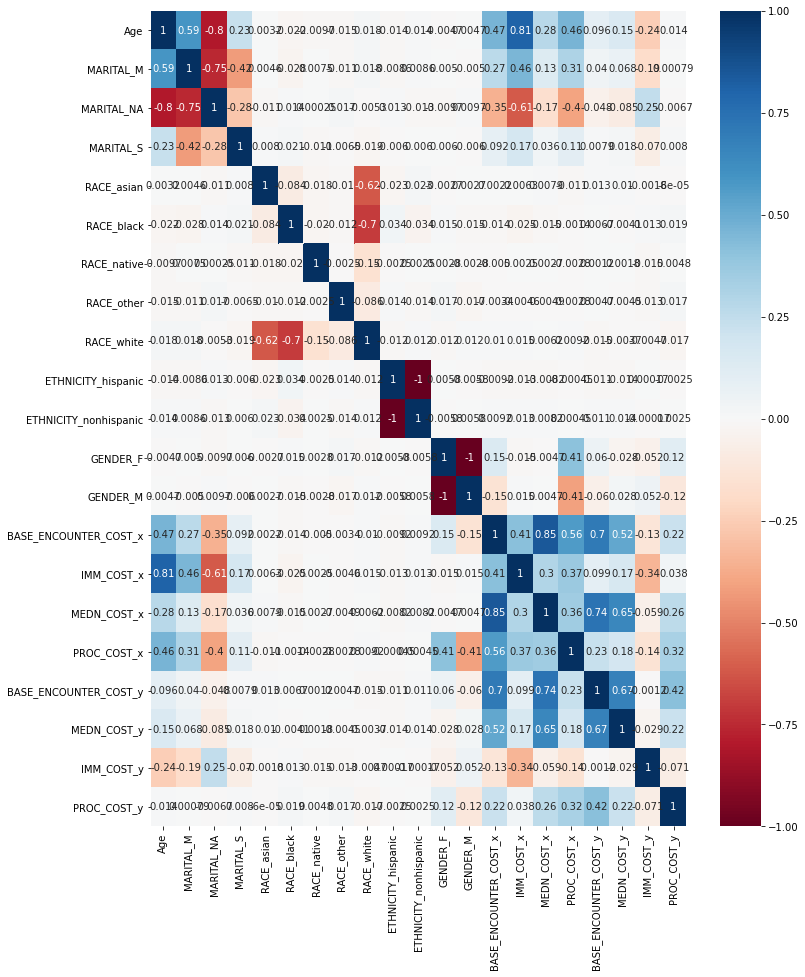

In [928]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,15))
corr=df1.corr()
top_corr_features=corr.index
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap='RdBu')

Seperating the X and Y

In [929]:
X=final_merged_df.drop(['BASE_ENCOUNTER_COST_y','MEDN_COST_y','Total','IMM_COST_y','PROC_COST_y'], axis=1)
#X=final_merged_df[['BASE_ENCOUNTER_COST_x','IMM_COST_x','MEDN_COST_x','PROC_COST_x']]
Y=final_merged_df['BASE_ENCOUNTER_COST_y']

In [930]:
X

,Age,MARITAL_M,MARITAL_NA,MARITAL_S,RACE_asian,RACE_black,RACE_native,RACE_other,RACE_white,ETHNICITY_hispanic,ETHNICITY_nonhispanic,GENDER_F,GENDER_M,BASE_ENCOUNTER_COST_x,IMM_COST_x,MEDN_COST_x,PROC_COST_x,"(410620009, wellness)","(50849002, emergency)","(185345009, ambulatory)","(185349003, ambulatory)","(185349003, outpatient)","(162673000, wellness)","(185347001, ambulatory)","(185345009, outpatient)","(698314001, outpatient)","(308335008, outpatient)","(424441002, ambulatory)","(270427003, ambulatory)","(424619006, ambulatory)","(185347001, inpatient)","(183460006, emergency)","(169762003, ambulatory)","(702927004, urgentcare)","(390906007, ambulatory)","(170837001, ambulatory)","(371883000, ambulatory)","(170838006, ambulatory)","(394701000, ambulatory)","(183478001, emergency)","(183495009, inpatient)","(305408004, inpatient)","(79094001, ambulatory)","(185317003, ambulatory)","(47505003, ambulatory)","(210098006, ambulatory)","(183452005, inpatient)","(56876005, inpatient)","(185347001, outpatient)","(230690007, emergency)",...,363406005,367498001,370143000,370247008,398254007,399211009,403190006,403191005,403192003,406602003,408512008,410429000,417532002,418689008,419263009,419474003,420174000,422034002,424132000,424213003,425525006,427089005,428251008,429007001,429280009,431855005,431856006,433144002,443165006,444448004,444470001,444814009,446096008,448417001,448813005,449868002,698754002,703151001,707577004,713197008,714035009,1501000119109,1551000119108,60951000119105,67811000119102,90781000119102,97331000119101,124171000119105,157141000119108,368581000119106
0,80,0,0,1,0,0,0,0,1,0,1,0,1,17953.24,8852.76,8382.49,56987.46,26.0,5.0,20.0,3.0,9.0,42.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,1,0,0,0,0,0,0,1,0,1,1,0,15499.20,5761.32,1334.57,861018.06,26.0,1.0,9.0,1.0,3.0,12.0,1.0,1.0,6.0,13.0,5.0,0.0,33.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23,0,1,0,0,0,0,0,1,0,1,1,0,6845.48,6463.92,1936.96,41369.51,26.0,3.0,4.0,2.0,0.0,2.0,0.0,1.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,82,1,0,0,0,0,0,0,1,0,1,0,1,18599.04,8571.72,13639.19,204560.05,26.0,7.0,22.0,9.0,4.0,44.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,1,0,0,0,0,0,0,1,0,1,0,1,23119.64,8993.28,62934.40,96399.47,26.0,10.0,12.0,6.0,66.0,33.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Splitting the data in the ratio of 80% and 20% for training and testing

In [931]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=4)

## Linear Regression

In [932]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

In [933]:
print(lr.score(X_test, Y_test))

0.6787716944706675


In [934]:
Y_test[0:20]

3341     645.80
1738     516.64
6388     258.32
186      129.16
2521     645.80
3721    2583.20
4332     258.32
2806     645.80
2194     129.16
1431     129.16
7258     129.16
3811     387.48
3527     129.16
4250     387.48
702      258.32
3166     129.16
7473     258.32
2555     258.32
8798     258.32
4503     129.16
Name: BASE_ENCOUNTER_COST_y, dtype: float64

In [935]:
Y_pred[0:20]

array([ 308.43692175,  673.54740328,  286.84209901,  185.88072902,
        287.82645589, 3582.56928378,  168.19691983,  833.59411922,
        320.92683882,  238.87315267,  138.27207151,  512.78164047,
        217.59958291,  326.96707025,  144.24417192,   63.68197089,
        262.00735748,  399.38441086,  265.66264611,  354.47640017])

In [936]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(Y_test,Y_pred)

0.6787716944706675

## Ridge and Lasso Regularization

In [937]:
from sklearn.linear_model import Ridge,Lasso
ridge=Ridge(alpha=0.005)
ridge.fit(X_train,Y_train)
ridge_pred=ridge.predict(X_test)
score=r2_score(Y_test,ridge_pred)
print('Ridge score:',round(score,2))

Ridge score: 0.68


C:\Users\soodi\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.36695e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [938]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=lr.predict(X_test)
print('Prediction on test data:',Y_pred[:5])    
print('r2_score  of our model is',r2_score(Y_test,Y_pred))
print('Mean squared error for our model is',mean_squared_error(Y_test,Y_pred,squared=False))

Prediction on test data: [308.43692175 673.54740328 286.84209901 185.88072902 287.82645589]
r2_score  of our model is 0.6787716944706675
Mean squared error for our model is 610.5218282549777


## Conclusion: Our regression model has score of .68 with MSE of 610 which is reasonable.